# Machine learning
at the intersection of statistics and artificial intelligence

algorithms for inferring unknowns from unknowns




## ML Model



A Model is a description of possible data one could observe



###  Generative Models
To get the conditional probability P(Y|X), generative models estimate the prior P(Y) and likelihood P(X|Y) from training data and use Bayes rule to calculate the posterior P(Y |X):

![bayes](https://wikimedia.org/api/rest_v1/media/math/render/svg/87c061fe1c7430a5201eef3fa50f9d00eac78810)

we have a notion of the underlying *distribution* of the data and we want to find the hidden parameters of that distribution. Some approaches are:

- Naive Bayes classifiers, 
- Gaussian mixture models,
- variational autoencoders, 
- generative adversarial networks and others.

### Discriminative Models

discriminative models directly assume functional form for P(Y|X) and estimate parameters of P(Y|X) directly from training data. They are more suitable when we only want to find the boundary that separates the data into different classes.

- support vector machines
- logistic regression (LR), 
- perceptron








## Python modules

There are multiple modules for machine learning in python, which you will regularly use alongside moddules like `numpy`, `scipy`, and `pandas`

- `sckit-learn`: https://scikit-learn.or
- `theano`: https://github.com/Theano/Theano --> (https://github.com/pymc-devs/aesara)
- `pytorch`: https://pytorch.org/
- `tensorflow`: http://tensorflow.org/
- `keras`: https://keras.io/

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
color = ['#377eb8', '#ff7f00', '#4daf4a',
         '#f781bf', '#a65628', '#984ea3',
        '#999999', '#e41a1c', '#dede00']

## Supervised learning


given a some data (Xi,Yi)...(Xn, Yn), choose a function f(x) that takes a (new) data point X and gives you a Y. This is an illposed problem. Very difficult to do unless by making certain assumptions

- Classification: Yi belong to one finite set
- Regression: Y belong to R, or R**d



### Regression
Suppose that Xi are real valued, and Yi are real valued

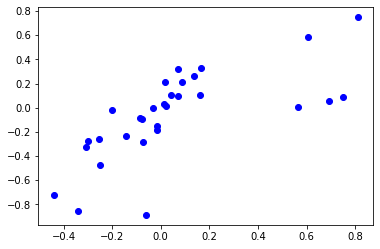

In [ ]:
N = 30
xc = np.random.random((2,N))
# fake tendency line
tendency = np.linspace(-1,1,N) 
xc *= tendency
plt.scatter(xc[0],xc[1], color='b')

Given an X, figure out what Y is associated to that value. Function that returns values for any given X.

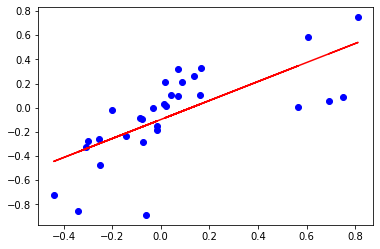

In [ ]:
from sklearn.linear_model import LinearRegression 
linear_regressor = LinearRegression()  # create object for the class
plt.scatter(xc[0],xc[1], color='b')
estimate = linear_regressor.fit(xc[0].reshape(-1,1), xc[1].reshape(-1,1))  # perform linear regression
pred = linear_regressor.predict(xc[0].reshape(-1,1))  # make predictions
plt.plot(xc[0], pred, color='r')

### Classification
Suppose we have 20 data points in two dimensions (x1, x2) with two classes/labels (y1, y2)

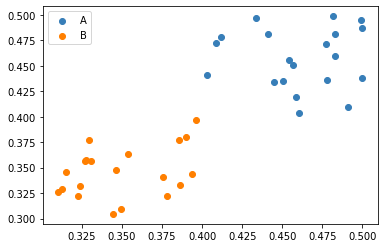

In [ ]:
a = (np.random.random(20) * 0.1 + 0.4, np.random.random(20) * 0.1 + 0.4)
b = (np.random.random(20) * 0.1 + 0.3, np.random.random(20) * 0.1 + 0.3)
plt.scatter(a[0],a[1],c=color[0],label='A')
plt.scatter(b[0],b[1],c=color[1],label='B')
plt.legend()

## Unsupervised learning

Given some data (x1,...,xn), find patterns in data (whatever that means)

some types of patterns:

- Clustering
- Density estimation
- Dimensionality reduction

### Clustering
Given some points in two dimensional real space (R2), find groups of clusters on the data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


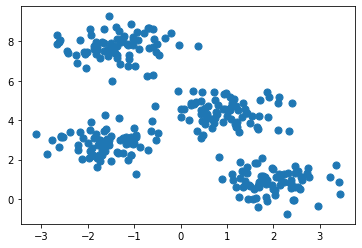

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

X, _ = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

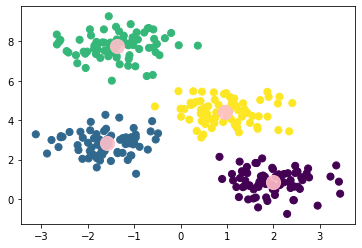

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='pink', s=200, alpha=0.9);

## Linear Classification

### Perceptron

In [ ]:
data = np.random.random((100,2))

In [ ]:
print(data[:2])

[[0.19631142 0.54006566]
 [0.65221156 0.49457156]]


In [ ]:
labels = np.where(data[:,0] > data[:,1], 1, -1)

In [ ]:
print(labels, labels.shape)

[-1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1
 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1  1  1  1  1  1 -1 -1 -1
  1 -1  1  1 -1  1 -1  1  1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1
  1 -1  1 -1 -1 -1  1  1  1  1 -1  1 -1  1  1  1 -1 -1 -1  1  1 -1 -1 -1
 -1 -1  1  1] (100,)


In [ ]:
print(np.where(labels==1,'A','B'))

['B' 'A' 'B' 'A' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'A' 'B' 'B' 'B' 'B' 'A'
 'B' 'B' 'A' 'A' 'B' 'A' 'B' 'A' 'B' 'B' 'A' 'B' 'B' 'B' 'A' 'B' 'B' 'B'
 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'B' 'A' 'B' 'A' 'A' 'B' 'A'
 'B' 'A' 'A' 'B' 'A' 'A' 'B' 'A' 'B' 'B' 'A' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'A' 'B' 'A' 'B' 'B' 'B' 'A' 'A' 'A' 'A' 'B' 'A' 'B' 'A' 'A' 'A' 'B' 'B'
 'B' 'A' 'A' 'B' 'B' 'B' 'B' 'B' 'A' 'A']


In [ ]:
# turn labels [-1 1] into colors just for plotting
color_labels = np.where(labels==1,color[0],color[1])
print(color_labels)

['#ff7f00' '#377eb8' '#ff7f00' '#377eb8' '#ff7f00' '#ff7f00' '#ff7f00'
 '#ff7f00' '#ff7f00' '#ff7f00' '#ff7f00' '#ff7f00' '#377eb8' '#ff7f00'
 '#ff7f00' '#ff7f00' '#ff7f00' '#377eb8' '#ff7f00' '#ff7f00' '#377eb8'
 '#377eb8' '#ff7f00' '#377eb8' '#ff7f00' '#377eb8' '#ff7f00' '#ff7f00'
 '#377eb8' '#ff7f00' '#ff7f00' '#ff7f00' '#377eb8' '#ff7f00' '#ff7f00'
 '#ff7f00' '#377eb8' '#377eb8' '#377eb8' '#ff7f00' '#377eb8' '#377eb8'
 '#377eb8' '#377eb8' '#377eb8' '#ff7f00' '#ff7f00' '#ff7f00' '#377eb8'
 '#ff7f00' '#377eb8' '#377eb8' '#ff7f00' '#377eb8' '#ff7f00' '#377eb8'
 '#377eb8' '#ff7f00' '#377eb8' '#377eb8' '#ff7f00' '#377eb8' '#ff7f00'
 '#ff7f00' '#377eb8' '#ff7f00' '#ff7f00' '#ff7f00' '#ff7f00' '#ff7f00'
 '#ff7f00' '#ff7f00' '#377eb8' '#ff7f00' '#377eb8' '#ff7f00' '#ff7f00'
 '#ff7f00' '#377eb8' '#377eb8' '#377eb8' '#377eb8' '#ff7f00' '#377eb8'
 '#ff7f00' '#377eb8' '#377eb8' '#377eb8' '#ff7f00' '#ff7f00' '#ff7f00'
 '#377eb8' '#377eb8' '#ff7f00' '#ff7f00' '#ff7f00' '#ff7f00' '#ff7f00'
 '#377

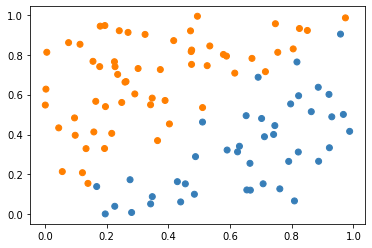

In [ ]:
plt.scatter(data[:,0], data[:,1], c=color_labels)

We need to figure how to classify a new point. 

In [ ]:
new_point = [0.5, 0.85]

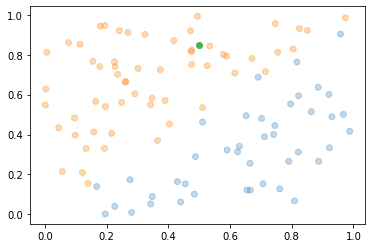

In [ ]:
plt.scatter( data[:,0], data[:,1], c=color_labels, alpha=0.3 )
plt.scatter(new_point[0], new_point[1], c=color[2]) # new point

#### Perceptron (classifier)

https://en.wikipedia.org/wiki/Perceptron


https://towardsdatascience.com/perceptron-explanation-implementation-and-a-visual-example-3c8e76b4e2d1

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

<img src="https://miro.medium.com/max/1000/1*7pwA1DjBw6JDkwZQecUNiw.png" alt="drawing" width="500"/>

The equation looks like this : ![eq](https://wikimedia.org/api/rest_v1/media/math/render/svg/bf43c01ee8403ea39c2f6d2829576c1769a100d7)

In [ ]:
from sklearn.linear_model import Perceptron as skPerceptron
classifier = skPerceptron()
c = classifier.fit(data, labels)

In [ ]:
# _new_point = new_point
_new_point = np.random.random(2) 
prediction = c.predict([_new_point])
print(f"point {_new_point} has label: {np.where(prediction==1,'A','B')}")

point [0.4433292  0.40664541] has label: ['A']


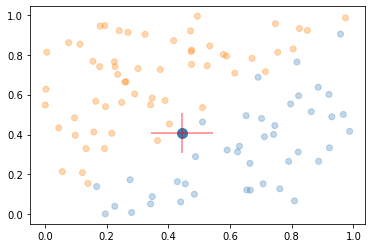

In [ ]:
plt.scatter(data[:,0],data[:,1],color=color_labels, alpha=0.3)
plt.scatter(_new_point[0],_new_point[1], s=100,c=np.where(prediction==1,color[0],color[1])) # new point
plt.vlines(_new_point[0],_new_point[1]-0.1,_new_point[1]+0.1,'r', alpha=0.5)
plt.hlines(_new_point[1],_new_point[0]-0.1,_new_point[0]+0.1,'r', alpha=0.5)

In [ ]:
class Perceptron(object):
    

    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta #Learning rate
        self.n_iter = n_iter #number of steps

    def fit(self, X, y):
        """
        Search for optimal weights
        """
        
        # initialize weights to zero? 
        # we could pick random weights, also
        # one more than shape of x features
        
        self.w_ = np.zeros(1 + X.shape[1])
        print(self.w_.shape)
        self.history = []
        self.errors_ = [] 
        
        # loop throught training data
        for i in range(self.n_iter):
            print("Epoch:", i)
            hist = []
            errors = 0 # local error variable (counter, keep track of num err)
        
            for xi, target in zip(X,y):
                # get weight value by applying the learning rate (eta)
                # to the error of our update weight

                # subtract the predicted value from the target (label)
                # only possible diff output are: 0, 2, or -2
                #     zero denotes a correct prediction
                #     2 or -2 denotes an incorrect prediction
                diff = target - self.predict(xi)
                # now, multiply difference error by learning rate
                weight = self.eta * diff
                # set weight vector for each of the feats
                feat_weight = weight * xi
                # increment weights of this particular feature
                self.w_[1:] +=  feat_weight
                # NOTE: first value in weight vector 
                # does not correspond to a particular feature
                # so, update first value with general weight
                self.w_[0] += weight
                # update errors only if difference was mistaken
                if diff != 0:
                    errors += diff
                hist.append(self.w_)
            # append the error counter to errors list
            self.errors_.append(errors)
            self.history.append(hist)
        self.history = np.array(self.history)
        return self

    def sum_input_and_weights(self, X):
        """
        Linear combination of the weights and the feature vector
        """
        summ = np.dot(X, self.w_[1:])
        summ += self.w_[0] # add initial weight

        return summ
    
    def activation(self, x):
        """
        Activation function for positive/negative
        """
        y = np.where(x >= 0.0, 1, -1)

        return y
    
    def predict(self, X):
        
        sum_result = self.sum_input_and_weights(X)
        prediction = self.activation(sum_result)

        return prediction

In [ ]:
p = Perceptron(eta=0.01,n_iter=10)

In [ ]:
p.fit(data, labels)

(3,)
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9


In [ ]:
p.predict(np.random.random(2))

array(1)

In [ ]:
print(p.errors_)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
p.history.shape
x = np.linspace(0,1,p.n_iter)



point [0.98957914 0.97579757]
Sklearn Perceptron: ['A']
Custom Perceptron:  A


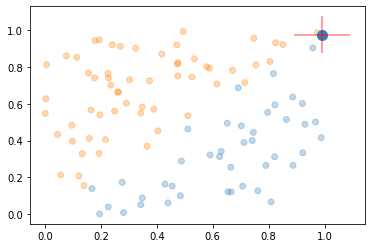

In [ ]:
_new_point = np.random.random(2) 

prediction = c.predict([_new_point])
custom_prediction = p.predict(_new_point)

print(f"point {_new_point}")
print(f"Sklearn Perceptron: {np.where(prediction==1,'A','B')}")
print(f"Custom Perceptron:  {np.where(custom_prediction==1,'A','B')}")


plt.scatter(data[:,0],data[:,1],color=color_labels, alpha=0.3)

plt.scatter(_new_point[0],_new_point[1], s=100,c=np.where(prediction==1,color[0],color[1])) # new point

plt.vlines(_new_point[0],_new_point[1]-0.1,_new_point[1]+0.1,'r', alpha=0.5)
plt.hlines(_new_point[1],_new_point[0]-0.1,_new_point[0]+0.1,'r', alpha=0.5)

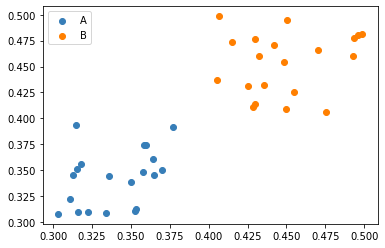

In [ ]:
plt.scatter(np.random.random(20)*0.1+0.3,np.random.random(20)*0.1+0.3, c=color[0], label='A')
plt.scatter(np.random.random(20)*0.1+0.4,np.random.random(20)*0.1+0.4, c=color[1], label='B')
plt.legend()

### Support Vector Machine (classifier)

The core idea of SVM is to find a maximum marginal line (or hyperplane in multivariate data) that best divides the dataset into classes.

In [ ]:
from sklearn import svm
m = svm.SVC(kernel='linear')

In [ ]:
m_fitted = m.fit(data, labels)
m_fitted.score(data,labels)

0.96

In [ ]:
prediction = m_fitted.predict([new_point])
print(f"point {new_point} has label: {prediction}")

point [0.5, 0.85] has label: [-1]


In [ ]:
print(m.classes_) # classes or labels we gave it
print(m.n_support_) # get number of support vectors for each class
print(m.support_) # get indices of support vectors

[-1  1]
[23 23]
[ 4  5  6  8  9 14 15 26 29 30 31 34 35 39 45 49 54 63 66 68 76 93 95  1
 17 23 28 36 37 40 42 43 44 48 51 53 56 58 59 64 79 81 83 85 86 99]


[here](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb#scrollTo=OG0aRVuoOsX6&line=1&uniqifier=1)'s a function to plot svc decision function

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=4, facecolors='grey', alpha=0.2);
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


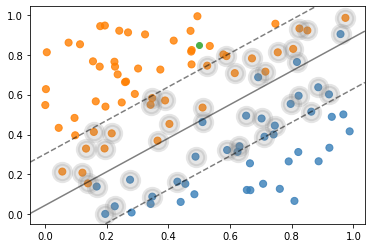

In [ ]:
#  plot points
plt.scatter(data[:,0],data[:,1],color=color_labels, s=50, alpha=0.8)
#  labelled new point
plt.scatter(new_point[0],new_point[1], color=color[2]) 
#  plot support vectors and decision function
plot_svc_decision_function(m)
# plt.scatter(m.support_vectors_[:,0], m.support_vectors_[:,1], s=300, alpha=0.4, facecolors='grey')

### Cross validation

![cross](https://miro.medium.com/max/720/1*chD302ssE0O62wreunGp4A.jpeg)

code adapted from: 
https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb#scrollTo=JN-t-aHksW1p

In [ ]:
from sklearn.model_selection import train_test_split
 # 70% training and 30% test
print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3,random_state=None)
print("X_train.shape :", X_train.shape )  
print("X_test.shape  :", X_test.shape  )
print("y_train.shape :", y_train.shape )
print("y_test.shape  :", y_test.shape  )
m = svm.SVC()
m_fitted = m.fit(X_train, y_train)
# prediction = m_fitted.predict([new_point])
print("Score:", m.score(X_test,y_test)*100)

(100, 2) (100,)
X_train.shape : (70, 2)
X_test.shape  : (30, 2)
y_train.shape : (70,)
y_test.shape  : (30,)
Score: 93.33333333333333


Finally, we can use a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel), and determine the best model:

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {'C'    : [1, 5, 10, 50, 55, 25],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.0055, 0.0025]}



grid = GridSearchCV(m, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 228 ms, sys: 0 ns, total: 228 ms
Wall time: 232 ms
{'C': 55, 'gamma': 0.0025}


In [ ]:
model = grid.best_estimator_
yfit = model.predict(X_test)

In [ ]:
print("Score:", model.score(X_test, y_test)*100)

Score: 96.66666666666667


[ 1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1
 -1  1 -1 -1  1  1]


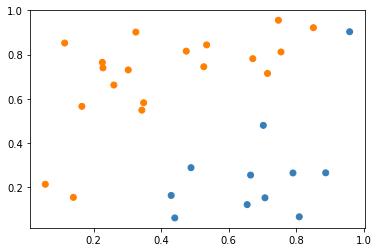

In [ ]:
plt.scatter(X_test[:,0], X_test[:,1], c=np.where(y_test==1,color[0],color[1]))
print(yfit)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit,
                            labels=labels, target_names=np.where(y_test==1,'A','B')))

              precision    recall  f1-score   support

           A       0.95      1.00      0.97        19
           B       1.00      0.91      0.95        11
           A       0.95      1.00      0.97        19
           B       1.00      0.91      0.95        11
           B       0.95      1.00      0.97        19
           B       0.95      1.00      0.97        19
           A       0.95      1.00      0.97        19
           B       0.95      1.00      0.97        19
           A       0.95      1.00      0.97        19
           B       0.95      1.00      0.97        19
           B       0.95      1.00      0.97        19
           B       0.95      1.00      0.97        19
           B       1.00      0.91      0.95        11
           B       0.95      1.00      0.97        19
           B       0.95      1.00      0.97        19
           A       0.95      1.00      0.97        19
           A       0.95      1.00      0.97        19
           B       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1989: UserWarning: labels size, 100, does not match size of target_names, 30
  .format(len(labels), len(target_names))


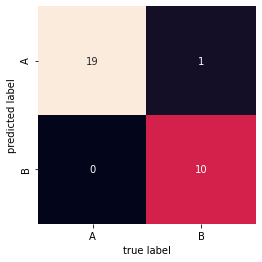

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, cbar=False,
            xticklabels=['A','B'],
            yticklabels=['A','B'])
plt.xlabel('true label')
plt.ylabel('predicted label');

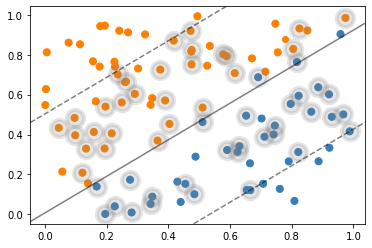

In [ ]:
__new_point = np.random.random(2)
_prediction = model.predict([__new_point])
#  plot points
plt.scatter(data[:,0],data[:,1],color=color_labels, s=50)
#  labelled new point
plt.scatter(__new_point[0],__new_point[1], color=np.where(_prediction==1,color[0],color[1])) 
#  plot support vectors and decision function
plot_svc_decision_function(model)
# plt.scatter(m.support_vectors_[:,0], m.support_vectors_[:,1], s=300, alpha=0.4, facecolors='grey')

In [ ]:
print(m.support_vectors_ == model.support_vectors_)

False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


# Exercise

Prepare data from the the Spotify API (or other sources) so it can be used on a Linear Classifier such as the SVM

In [ ]:
# import pandas as pd ?

# load file
# get feature vector (eg, danceability, instrumentality..., etc)
# get labels (eg, artist name,) 
# split data into training, test,
 